## Import Libraries

In [1]:
"""
creat a conda environment and run

!pip install 'pandas==1.3.4'
!pip install 'numpy==1.21.2'
!pip install 'rdkit==2020.09.1'
!pip install 'matplotlib==3.5.0'

"""

"\ncreat a conda environment and run\n\n!pip install 'pandas==1.3.4'\n!pip install 'numpy==1.21.2'\n!pip install 'rdkit==2020.09.1'\n!pip install 'matplotlib==3.5.0'\n\n"

In [2]:
'''Import of Libraries'''

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
from rdkit import rdBase

import seaborn as sns

import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt
import matplotlib

from matplotlib_venn import venn2
from matplotlib_venn import venn3

import platform

import chemplot as cp
from chemplot import Plotter
from chemplot import descriptors

In [3]:
"""
Version here used

Python Version: 3.7.11
Pandas Version: 1.3.4
Seaborn Version: 0.11.2
RDKit Version: 2020.09.1
Operating System (OS): Windows-10-10.0.19041-SP0
Mathplotlib Version: 3.5.0
Numpy Version: 1.21.2
"""

print("Python Version: " + platform.python_version())
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("RDKit Version: " + rdBase.rdkitVersion )
print("Operating System (OS): " + platform.platform())
print("Mathplotlib Version: " + matplotlib.__version__)
print("Numpy Version: " + np.__version__)

Python Version: 3.7.11
Pandas Version: 1.3.4
Seaborn Version: 0.11.2
RDKit Version: 2020.09.1
Operating System (OS): Windows-10-10.0.19041-SP0
Mathplotlib Version: 3.5.0
Numpy Version: 1.21.2


## Global Variables

In [23]:
import_keyname = "SDMolSupplier_Object"
dataset_lenght_keyname = "number_of_molecules"
identifier_keyname = "identifier_list"
duplicates_keyname = "number_of_duplicates"
shared_mols_keyname = "number_of_shared_molecules"
shared_mols_id_keyname = "shared_molecules"
lipinski_list_keyname = "number_of_broken_Lipinski_Rules"
lipinski_summary_keyname = "Lipinski_Rule_of_5_summary"
mol_grid_keyname = "molecule_picture"
database_id_keyname = "coconut_id_keyname"

## Data Import

In [5]:
def import_as_data_dict(path_to_data: str) -> dict:
    """
    This function returns a dictionary with the imported file names (keys) as its own dictionaries with 
    the first entry as import_keyname (key) and the SDMolSupplier Objects (value).
    
    Args:
        path_to_data (str): Path to the directory where the SDFiles are stored.
        
    Returns:
        all_dicts (dict): Dictionary of dictionaries for every dataset with the SDMolSupplier Objects.
    """ 
    all_dicts = {}
    data_dir = os.path.normpath(str(path_to_data))
    for dict_name in os.listdir(data_dir):
        singel_dict = {}
        dict_path = os.path.join(data_dir, dict_name)
        singel_dict[import_keyname] = Chem.SDMolSupplier(dict_path)
        all_dicts[dict_name] = singel_dict
    return all_dicts

testdict = import_as_data_dict('data2')
testdict.keys()   
testdict['set_phenole.sdf'].keys()

dict_keys(['SDMolSupplier_Object'])

## Overview Dataset Size

In [6]:
def get_number_of_molecules(all_dicts: dict) -> dict:
    """
    This function updates the dictionaries in the given dictionary (created from import_as_data_dict function) 
    with the number of molecules in every dataset as new key-value pair.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with SDMolSupplier Objects.
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with dataset_lenght_key.
    """
    for single_dict in all_dicts:
        number_of_molecules = len(all_dicts[single_dict][import_keyname])
        all_dicts[single_dict][dataset_lenght_keyname] = number_of_molecules
    for single_dict in all_dicts:
        print('Number of molecules in ' + single_dict + ': ' + str(all_dicts[single_dict][dataset_lenght_keyname]) )
    return all_dicts
    
get_number_of_molecules(testdict)
testdict['set_chlorbenzene.sdf'].keys()

Number of molecules in no_lipinski.sdf: 100
Number of molecules in set_chlorbenzene.sdf: 100
Number of molecules in set_phenole.sdf: 100


dict_keys(['SDMolSupplier_Object', 'number_of_molecules'])

## Overview molecules (visualization of molecules)

In [7]:
def draw_molecules(all_dicts: dict,
                   number_of_mols: int = 12,
                   image_size: int = 200,
                   data_type: str = "png"):
    """
    This function returns the given dictionary of dictionaries updated with mol_grid_keyname
    as a new key-value pair containing an image of a chosen number of molcules from the respecting dataset.
    The created images are also saved in an output folder and are shown (not in-line, but in extra fenster).
    
    Args:
        all_dict (dict): dictionary of dictionaries with SDMolSupplier Objects (import_keyname).
        number_of_mols (int): number of molecules that will be displayed.
        image_size (int): size of the image for a single molecule.
        data_type (str): data type for the exported files (e.g. png, jpg, pdf).
        
    Returns:
        all_dicts (dict): updated dictionary with mol_grid_keyname
        images are saved in an output folder.
    """
    for single_dict in all_dicts:
        to_draw = []
        for i in range (number_of_mols):
            to_draw.append(all_dicts[single_dict][import_keyname][i])
        mol_grid = Draw.MolsToGridImage(to_draw,
                                        maxMols = number_of_mols,
                                        subImgSize=(image_size, image_size),
                                        returnPNG=False
                                        )    
        all_dicts[single_dict][mol_grid_keyname] = mol_grid
        if not os.path.exists('output'):
            os.makedirs('output')
        filename =  single_dict[:-4]
        mol_grid.save("output/mol_grit_%s.%s" % (filename, data_type))
        all_dicts[single_dict][mol_grid_keyname].show() 
    return all_dicts


draw_molecules(testdict, number_of_mols = 6)
testdict['set_phenole.sdf'].keys()

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture'])

## Get  Database ID

In [8]:
def get_database_id(all_dicts : dict,
                   id_name : str = "coconut_id") -> dict:
    """
    This function returns the updated dictionaries in an given dictionary with a list of
    IDs for the single molecules as new key-value pair. Depending from with database 
    a moleculeset is coming from the id_name can be changed accordingly.
    
    Args:
        all_dicts (dict): dictionary of dictionary including SDMolSupplier Objects (import_keyname)
        id_name (str): ID name in the original SDFile.
        
    Returns:
        all_dict: updated dictionary with database_id_keyname
    """
    database_id_keyname =  str(id_name + '_keyname')
    for single_dict in all_dicts:
        database_id_list = []
        for mol in all_dicts[single_dict][import_keyname]:
            prop_dict = mol.GetPropsAsDict()
            database_id = prop_dict.get(id_name)
            database_id_list.append(database_id)
            all_dicts[single_dict][database_id_keyname] = database_id_list
    return all_dicts

get_database_id(testdict, 'coconut_id')
testdict['set_chlorbenzene.sdf'].keys()


dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'coconut_id_keyname'])

## Get Chemical Identifier

In [9]:
'''Identifier-List for ONE Dataset'''

def get_identifier_list(
    moleculeset: Chem.SDMolSupplier, 
    id_type : str = "inchi"
    ):
    """
    This function returns a list of Chemical InChi, InChiKeys or SMILES strings for all molecules
    in a given SDMolSupplier object.

    Args:
        moleculeset (rdkit.Chem.SDMolSupplier):
        id_type (str, optional): "inchi", "inchikey" or "smiles". Defaults to "inchi".

    Raises:
        ValueError: if ID_type is not "inchi," "inchikey" or "smiles".

    Returns:
        List[str]: List of identifiers based on given molecules.
    """
    identifier_list = []
    for mol in moleculeset:
        if id_type == "smiles":
            identifier = Chem.MolToSmiles(mol)
        elif id_type == "inchikey":
            identifier = Chem.MolToInchiKey(mol)
        elif id_type == "inchi":
            identifier = Chem.MolToInchi(mol)
        else:
            raise ValueError('id_type argument needs to be "smiles", "inchikey" or "inchi"!')
        identifier_list.append(identifier)
    return identifier_list

In [10]:
def get_identifier_list_key(all_dicts: dict, id_type: str) -> dict:
    """
    This function returns the updated dictionaries in the given dictionary (created with the 
    import_as_data_dict function) with a list of identifiers (InChI, InChIKey, SMILES strings) as a new 
    key-value pair using the get_identifier_list function on the SDMolSupplier Objects.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with SDMolSupplier Objects (import_keyname).
        id_type (str): Type of Identifier ("inchi", "inchikey" or "smiles")
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with identifier_keyname.
    """
    for single_dict in all_dicts:
        identifier_list = get_identifier_list(all_dicts[single_dict][import_keyname], id_type)
        all_dicts[single_dict][identifier_keyname] = identifier_list
    return all_dicts
        
get_identifier_list_key(testdict, "inchi")
testdict['set_phenole.sdf'].keys()

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'coconut_id_keyname', 'identifier_list'])

## Testing for duplicates

In [11]:
def get_duplicate_key(all_dicts: dict):
    """
    This function returns the updated dictionaries in the given dictionary (created with the import_as_data_dict
    function) with the number of duplicates in the identifier list as new key-value-Pair.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with list of identifiers (identifier_keyname).
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with duplicate_keyname.
 
    """
    for single_dict in all_dicts:
        duplicates = len(all_dicts[single_dict][identifier_keyname]) - len(set(all_dicts[single_dict][identifier_keyname]))
        all_dicts[single_dict][duplicates_keyname] = duplicates
    for single_dict in all_dicts:
        print('Number of duplicates in ' + single_dict + ': ' + str(all_dicts[single_dict][duplicates_keyname]) )
    return all_dicts

get_duplicate_key(testdict)
testdict['set_phenole.sdf'].keys()

Number of duplicates in no_lipinski.sdf: 0
Number of duplicates in set_chlorbenzene.sdf: 0
Number of duplicates in set_phenole.sdf: 2


dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'coconut_id_keyname', 'identifier_list', 'number_of_duplicates'])

## Comparison of molecules and visualization

In [12]:
def get_shared_molecules_key(all_dicts: dict) -> dict:
    """
    This function returns the updated dictionaries in the given dictionary (created with the 
    import_as_data_dict function) with the number of molecules that can be found in all of the
    given datasets and a identifier list of these molecules as two new key-value pairs (number of 
    compared datasets can be any number).
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with lists of identifiers (identifier_keyname).
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with shared_keyname and shared_id_keyname.
    """
    sets = []
    for single_dict in all_dicts:
        single_set = set(all_dicts[single_dict][identifier_keyname])
        sets.append(single_set)  
        shared_molecules = set.intersection(*sets)
    for single_dict in all_dicts:
        all_dicts[single_dict][shared_mols_keyname] = len(shared_molecules)
        all_dicts[single_dict][shared_mols_id_keyname] = shared_molecules
    print('Number of molecules that can be found in all datasets: ' + str(len(shared_molecules)))
    return all_dicts

get_shared_molecules_key(testdict)
testdict['set_phenole.sdf'].keys()

Number of molecules that can be found in all datasets: 0


dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'coconut_id_keyname', 'identifier_list', 'number_of_duplicates', 'number_of_shared_molecules', 'shared_molecules'])

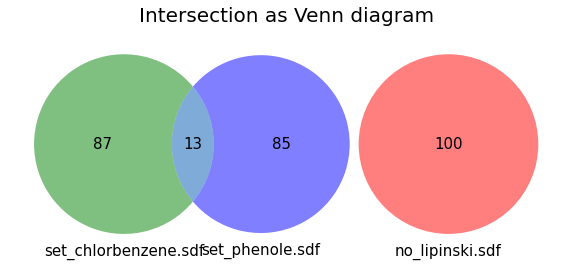

In [13]:
def visualize_intersection(all_dicts: dict,
                          data_type : str = 'png'):
    """
    This function returns a Venn-diagram of the identifier lists in the dicitionaries in the 
    given dictionary (as long as there are not more than three dictionaries). The diagram is
    saved in an output folder.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with identifier_keyname.
        data_type (str): Data type for the exported image (default: png)
        
    Returns:
        Venn Diagram
        
    Raises:
        WrongInputError: If there are one or more then three sets are to be compared a Error is raised.
    """
    sets = []
    for single_dict in all_dicts:
        single_set = set(all_dicts[single_dict][identifier_keyname])
        sets.append(single_set)
    plt.figure(figsize=(10,10))
    if len(sets) == 3:
        venn = venn3(sets, set_labels = (all_dicts.keys()), alpha = 0.5)
    elif len(sets) == 2:
        venn = venn2(sets, set_labels = (all_dicts.keys()), alpha = 0.5)
    else:
        raise WrongInputError('Visualization only possible for two or three data sets!')
    plt.title("Intersection as Venn diagram", fontsize=20)
    for text in venn.set_labels:
        text.set_fontsize(15)
    for x in range(len(venn.subset_labels)):
        if venn.subset_labels[x] is not None:
            venn.subset_labels[x].set_fontsize(15)
    if not os.path.exists('output'):
            os.makedirs('output')
    plt.savefig('output/intersection.%s' % (data_type), 
                bbox_inches='tight',
               transparent = True)
    return plt.show(venn)


visualize_intersection(testdict)

## Get Descriptor

In [14]:
def get_descriptor_list(moleculeset : Chem.SDMolSupplier, descriptor : callable,) -> list: 
    """
    This function returns a list of descriptor values for all molecules
    in a given SDMolSupplier object and a descriptor (e.g. Descriptors.MolWt or
    rdMolDescriptors.CalcExactMolWt).
    
    Args:
        moleculeset (rdkit.Chem.SDMolSupplier)
        descriptor (callable): RDKit method that returns a molecular descriptor for a given molecule.        
    
    Returns:
        List[]: List of Descriptor Values 
    """
    descriptor_list = []
    for mol in moleculeset:
        value = descriptor(mol)  
        descriptor_list.append(value)
    return descriptor_list

In [15]:
def get_descriptor_list_key(all_dicts: dict, 
                            descriptor: callable,
                            descriptor_list_keyname: str) -> dict:
    """
    This function returns the updated dictionaries in the given dictionary with a list of descriptor values 
    as a new key-value pair using the get_descriptor_list function on the SDMolSupplier Objects in the 
    dictionary.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with SDMolSupplier Object.
        descriptor (callable): RDKit method that returns a molecular descriptor for a given molecule 
        descriptor_list_keyname (str): Key name for the dictionary entry (should match the descriptor)
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with the descriptor key.
        (if function is called repeatedly with different descriptors several new Key-Value-Pairs a generated)
    """
    for single_dict in all_dicts:
        descriptor_list = get_descriptor_list(all_dicts[single_dict][import_keyname], descriptor)
        all_dicts[single_dict][descriptor_list_keyname] = descriptor_list
    return all_dicts  

In [16]:
get_descriptor_list_key(testdict, Descriptors.MolWt, 'MolWt')
get_descriptor_list_key(testdict, Descriptors.MolLogP, 'LogP')
get_descriptor_list_key(testdict, rdMolDescriptors.CalcMolFormula, 'MolFormula')
get_descriptor_list_key(testdict, Descriptors.NumHDonors, 'NumHDonors')
get_descriptor_list_key(testdict, Descriptors.RingCount, 'Number of Rings')
get_descriptor_list_key(testdict, Descriptors.NumHAcceptors, 'NumHAcceptors')
get_descriptor_list_key(testdict, Descriptors.Chi1, 'Chi1')
get_descriptor_list_key(testdict, Descriptors.Kappa1, 'Kappa1')
testdict['set_phenole.sdf'].keys()

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'coconut_id_keyname', 'identifier_list', 'number_of_duplicates', 'number_of_shared_molecules', 'shared_molecules', 'MolWt', 'LogP', 'MolFormula', 'NumHDonors', 'Number of Rings', 'NumHAcceptors', 'Chi1', 'Kappa1'])

## Get descriptor value with database ID

In [24]:
print(testdict['no_lipinski.sdf'][database_id_keyname][26])
print(testdict['set_phenole.sdf']["coconut_id_keyname"][26])
print(testdict['set_chlorbenzene.sdf']['coconut_id_keyname'][26])

CNP0000456
CNP0291002
CNP0001454


In [25]:
def get_value_from_id (all_dicts: dict,
                       wanted_id: str,
                       descriptor_list_keyname: str):
    """
    This function returns a descriptor value for a specific molecule refered to by its database ID and
    the dataset where the molecule has been found.
    
    Args:
        all_dicts (dict): dictionary of dictionaries with database_id_keyname and descriptor_list_keyname
        wanted_id (str): Database ID for the molecule of interest.
        descriptor_list_keyname (str): Descriptor value of interest.
    
    Returns:
        Print: Descriptor value and dataset where the molecule is found.
    
    """
    for single_dict in all_dicts:
        if wanted_id in all_dicts[single_dict][database_id_keyname]:
            print('Molecule found in ' + str(single_dict))
            index = all_dicts[single_dict][database_id_keyname].index(wanted_id)
            descriptor_value = all_dicts[single_dict][descriptor_list_keyname][index]
            print(str(descriptor_list_keyname) + ' value for ID ' + str(wanted_id) + ': '+ str(descriptor_value))
        else:
            print('Molecule not found in ' + str(single_dict))
    return 
        
get_value_from_id(testdict, 'CNP0291002', 'LogP')

Molecule not found in no_lipinski.sdf
Molecule found in set_chlorbenzene.sdf
LogP value for ID CNP0291002: 1.9537999999999995
Molecule found in set_phenole.sdf
LogP value for ID CNP0291002: 1.9537999999999995


## Descriptor binning and visualization

In [26]:
def get_discrete_descriptor_counts(all_dicts: dict, 
                                   descriptor_list_keyname: str):
    """
    This function returns the updated dictionaries in the given dictionary with the binned 
    descriptor values for a given descriptor value list with discrete values (e.g. number of 
    H-Bond donors or acceptors). 
    
    Args:
        all_dicts (dict): Dictionary of dictionaries including a continuous descriptor value list.
        descriptor_list_keyname (str): name of the descriptor list.
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with the binned descriptor values
                         (descriptor_list_keyname with 'binned' in front).
    """
    binned_descriptor_list_keyname = str('binned ' + descriptor_list_keyname)
    find_max = []
    for single_dict in all_dicts:
        find_max.append(max(all_dicts[single_dict][descriptor_list_keyname]))
    maximum = max(find_max) + 1
    bins = pd.interval_range(start=0, end=maximum, freq = 1, closed='left')
    for single_dict in all_dicts:
        counts = pd.value_counts(pd.cut(all_dicts[single_dict][descriptor_list_keyname], bins), sort=False)
        all_dicts[single_dict][binned_descriptor_list_keyname] = counts     
    return all_dicts

In [27]:
def get_continuous_descriptor_counts(all_dicts: dict, 
                                     descriptor_list_keyname: str,
                                     width_of_bins: int = 10) -> dict:
    """
    This function returns the updated dictionaries in the given dictionary with the binned 
    descriptor values for a given descriptor value list with continuous values (e.g. molecular
    weight or logP values). The intervall size of the bins can be chosen.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries including a continuous descriptor value list.
        descriptor_list_keyname (str): name of the descriptor list.
        widht_of_bins (int, optional): Interval size for the bins (default: 10)
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with the binned descriptor values.
    """
    binned_descriptor_list_keyname = str('binned ' + descriptor_list_keyname)
    find_min = []
    find_max = []
    for single_dict in all_dicts:
        find_min.append(min(all_dicts[single_dict][descriptor_list_keyname]))
        find_max.append(max(all_dicts[single_dict][descriptor_list_keyname]))
    if min(find_min) < round(min(find_min), ndigits=-1):
        lower = round(min(find_min), ndigits=-1) - 10
    else:
        lower = round(min(find_min), ndigits=-1)
    if max(find_max) > round(max(find_max), ndigits=-1):
        upper = round(max(find_max), ndigits=-1) +10
    else:
        upper = round(max(find_max), ndigits=-1)
    if (upper-lower)%width_of_bins == 0:
        bins = pd.interval_range(start=lower, end=upper, freq = width_of_bins)
    else:
        to_add = width_of_bins - (upper-lower)%width_of_bins
        bins = pd.interval_range(start=lower, end=(upper + to_add), freq = width_of_bins)    
    for single_dict in all_dicts:
        counts = pd.value_counts(pd.cut(all_dicts[single_dict][descriptor_list_keyname], bins), sort=False)
        all_dicts[single_dict][binned_descriptor_list_keyname] = counts     
    return all_dicts

In [28]:
def discrete_descriptor_plot(all_dicts:dict,
                            descriptor_list_keyname: str,
                            data_type : str = 'png',
                            save_dataframe : bool = True):
    """
    This function returns a Pandas DataFrame Object and the corresponding Bar-Plot for a discrete descriptor
    which was previously binned. The plot is saved in an output folder as image (data type can be chosen) and
    the dataframe is also saved as csv file.
    
    args:
        all_dicts (dict): Dictionary of dictionaries with descriptor_list_keyname.
        descriptor_list_keyname (str): Name of descriptor list for plotting.
        data_type (str): Data type for the exported image (default: png).
        save_dataframe (bool): Export dataframe as csv or not (default: True).
        
    returns:
        fig (mathplotlib.figure): Plot 
    """
    binned_descriptor_list_keyname = str('binned ' + descriptor_list_keyname)
    first_dict = list(all_dicts.keys())[0]
    y_max = len(all_dicts[first_dict][binned_descriptor_list_keyname])
    descriptor_df_dict = { str('Number of ' + descriptor_list_keyname) : list(range(y_max))}
    for single_dict in all_dicts:
        header = single_dict
        descriptor_df_dict.update({header : list(all_dicts[single_dict][binned_descriptor_list_keyname])})
    descriptor_df = pd.DataFrame(descriptor_df_dict)
    if not os.path.exists('output'):
            os.makedirs('output')
    if save_dataframe == True:
        descriptor_df.to_csv('output/table_%s.csv' % (descriptor_list_keyname))
    descriptor_plot = descriptor_df.plot(x = str('Number of ' + descriptor_list_keyname),
                     kind='bar',
                     stacked=False,
                     rot = 0,
                     figsize = (15,7),
                     fontsize = 15)
    descriptor_plot.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=15)
    descriptor_plot.set_ylabel('Number of molecules',fontsize=20)
    descriptor_plot.set_xlabel( str(descriptor_list_keyname) ,fontsize=20)
    descriptor_plot.set_title(str('Distribution of ' + descriptor_list_keyname), pad=20, fontsize=24) 
    fig = descriptor_plot.figure
    fig.savefig("output/distribution_of_%s.%s" % (descriptor_list_keyname, data_type), 
                bbox_inches='tight',
                transparent = True)
    return fig

In [29]:
def continuous_descriptor_plot(all_dicts: dict,
                               descriptor_list_keyname: str,
                               data_type: str = 'png',
                               save_dataframe: bool = True):
    """
    This function returns a Pandas DataFrame Object and the corresponding Bar-Plot for a continuous descriptor
    which was previously binned. The plot is saved in an output folder as image (data type can be chosen) and
    the dataframe is also saved as csv file
    
    args:
        all_dicts (dict): Dictionary of dictionaries with descriptor_list_keyname.
        descriptor_list_keyname (str): Name of descriptor list for plotting.
        data_type (str): Data type for the exported image (default: png).
        save_dataframe (bool): Export dataframe as csv or not (default: True).
        
    returns:
        fig (mathplotlib.figure): Plot
    """
    binned_descriptor_list_keyname = str('binned ' + descriptor_list_keyname)
    first_dict = list(all_dicts.keys())[0]
    descriptor_df_dict = {str(descriptor_list_keyname + ' Intervalls'): all_dicts[first_dict][binned_descriptor_list_keyname].keys()}
    for single_dict in all_dicts:
        header = single_dict
        descriptor_df_dict.update({header : list(testdict[single_dict][binned_descriptor_list_keyname])})
    descriptor_df = pd.DataFrame(descriptor_df_dict)
    if not os.path.exists('output'):
            os.makedirs('output')
    if save_dataframe == True:
        descriptor_df.to_csv('output/table_%s.csv' % (descriptor_list_keyname))
    descriptor_plot = descriptor_df.plot(x = str(descriptor_list_keyname + ' Intervalls'),
                 kind = 'bar',
                 stacked=False,
                 figsize = (15,7),
                 fontsize = 15
                 )
    descriptor_plot.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=15)
    descriptor_plot.set_ylabel('Number of molecules',fontsize=20)
    descriptor_plot.set_xlabel( str(descriptor_list_keyname + ' Intervalls') ,fontsize=20)
    descriptor_plot.set_title(str('Distribution of ' + descriptor_list_keyname), pad=20, fontsize=24)
    fig = descriptor_plot.figure
    fig.savefig("output/distribution_of_%s.%s" % (descriptor_list_keyname, data_type), 
                bbox_inches='tight',
                transparent = True)
    return fig

In [30]:
def descriptor_counts_and_plot(all_dicts: dict, 
                               descriptor_list_keyname: str,
                               width_of_bins : int = 10,
                               data_type: str = 'png',
                               save_dataframe: bool = True) -> dict:
    """
    This function returns the updated dictionaries in the given dictionary with the binned 
    descriptor values for a given descriptor value list. The values can either be continuous
    (binning with get_continuous_descriptor_counts and plotted with continuous_descriptor_plot)
    or discrete (binning with get_discrete_descriptor_counts and plotted with discrete_descriptor_plot).
    The created plots are saved in an output folder and the dataframe can also be exported as csv.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries including a descriptor value list.
        descriptor_list_keyname (str): name of the descriptor list for binning and plotting.
        widht_of_bins (int, optional): interval size for the bins for continuous values (default: 10).
        data_type (str): Data type for the exported image (default: png).
        save_dataframe (bool): Export dataframe as csv or not (default: True).
        
    Returns:
        descriptor_df (mathplotlib.figure): plot
    """
    first_dict = list(all_dicts.keys())[0]
    if type(all_dicts[first_dict][descriptor_list_keyname][0]) == int:
        get_discrete_descriptor_counts(all_dicts, descriptor_list_keyname)
        descriptor_df = discrete_descriptor_plot(all_dicts, descriptor_list_keyname, data_type, save_dataframe)
    elif type(all_dicts[first_dict][descriptor_list_keyname][0]) == float or type(all_dicts[first_dict][descriptor_list_keyname][0]) == np.float64 :
        get_continuous_descriptor_counts(all_dicts, descriptor_list_keyname, width_of_bins)
        descriptor_df = continuous_descriptor_plot(all_dicts, descriptor_list_keyname, data_type, save_dataframe)
    else:
        raise ValueError('Descriptor values should be "int" or "float" (numpy.float64) to be binned!')  
    return descriptor_df

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'coconut_id_keyname', 'identifier_list', 'number_of_duplicates', 'number_of_shared_molecules', 'shared_molecules', 'MolWt', 'LogP', 'MolFormula', 'NumHDonors', 'Number of Rings', 'NumHAcceptors', 'Chi1', 'Kappa1', 'binned MolWt', 'binned LogP', 'binned Number of Rings', 'binned NumHDonors'])

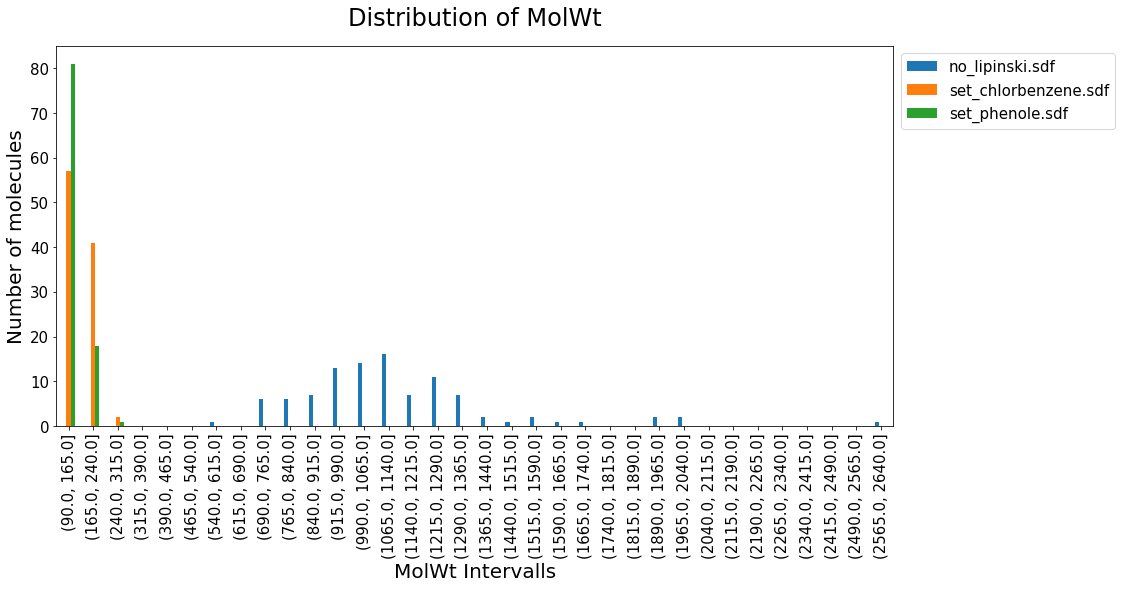

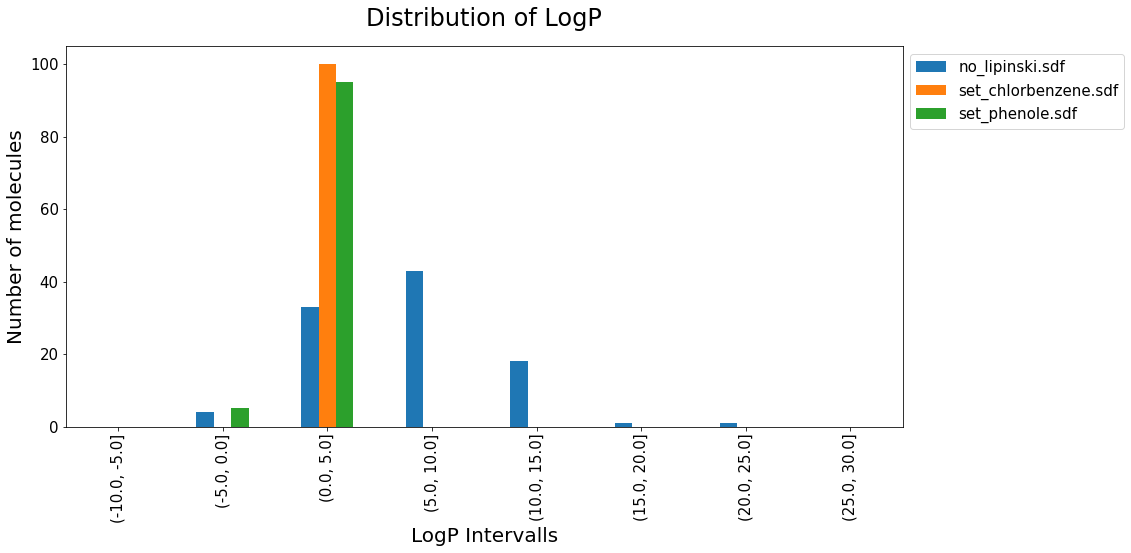

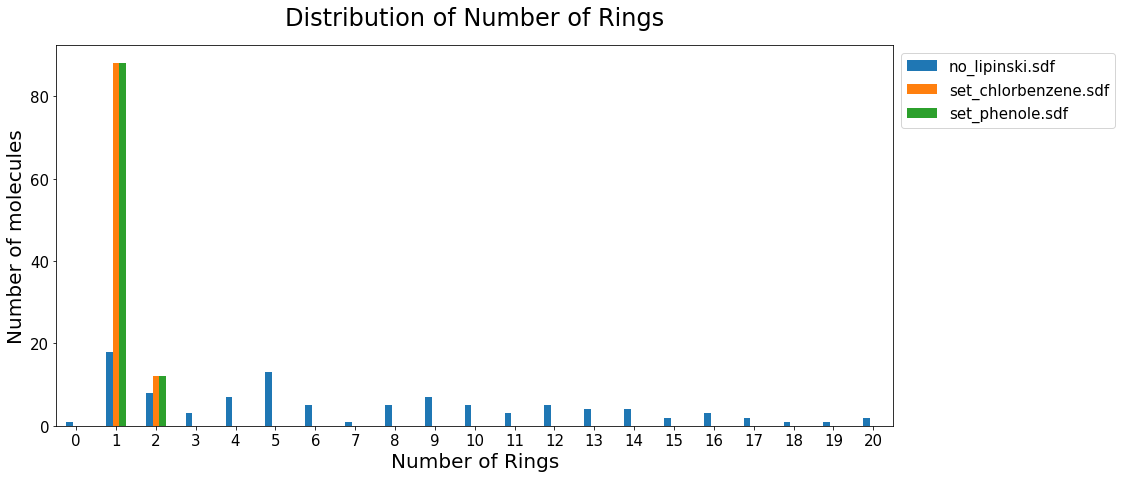

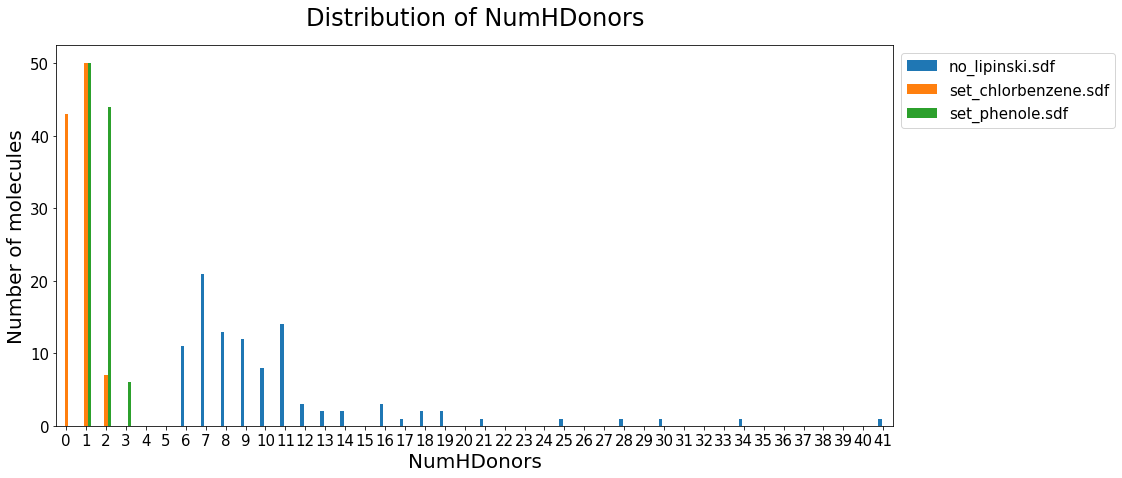

In [36]:
descriptor_counts_and_plot(testdict, 'MolWt', 75)
descriptor_counts_and_plot(testdict, 'LogP', 5)
descriptor_counts_and_plot(testdict, 'Number of Rings')
descriptor_counts_and_plot(testdict, 'NumHDonors')
testdict['set_phenole.sdf'].keys()

## Lipinski Rule of 5 with visualization

In [37]:
def test_for_lipinski(moleculeset: Chem.SDMolSupplier) -> list:
    """
    This function returns a list with the number of Lipinski Rules broken for every molecule in the given
    moleculeset.
    
    Args:
        moleculeset (Chem.SDMolSupplier): SDMolSupplier Objects 
        
    Returns:
        list[int]: List of number of broken Lipinski Rules.
    """
    num_of_break = []
    for mol in moleculeset:
        rule_break = 0
        if Descriptors.MolLogP(mol) > 5:
            rule_break +=1
        if Descriptors.MolWt(mol) > 500:
            rule_break +=1
        if Descriptors.NumHAcceptors(mol) > 10:
            rule_break +=1
        if Descriptors.NumHDonors(mol) > 5:
            rule_break +=1
        else:
            rule_break += 0
        num_of_break.append(rule_break)
    return num_of_break

In [38]:
def get_lipinski_key (all_dicts : dict) -> dict : 
    """
    This function returns the updated dictionaries in the given dictionary with the list of the number of broken
    Lipinski Rules (lipinski_list_keyname) using the test_for_lipinski function and a summary for the broken rules 
    (lipinski_summary_keyname).
    
    Args:
        all_dicts (dict): Dictionary of dictionaries with import_keyname (Value is a SDMolSupplier Object).
        
    Returns:
        all_dicts (dict): Given dictionary of dictionaries updated with the Lipinski Keys.
    """
    for single_dict in all_dicts:
        lipinski_break_list = test_for_lipinski(all_dicts[single_dict][import_keyname])
        all_dicts[single_dict][lipinski_list_keyname] = lipinski_break_list
        lipinski_summary = {"lipinski_molecules" : lipinski_break_list.count(0),
                            "1_rule_broken" : lipinski_break_list.count(1),
                            "2_rules_broken" : lipinski_break_list.count(2),
                            "3_rules_broken" : lipinski_break_list.count(3), 
                            "4_rules_broken" : lipinski_break_list.count(4)}
        all_dicts[single_dict][lipinski_summary_keyname] = lipinski_summary
    return all_dicts

get_lipinski_key(testdict)
testdict['set_phenole.sdf'].keys()

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'molecule_picture', 'coconut_id_keyname', 'identifier_list', 'number_of_duplicates', 'number_of_shared_molecules', 'shared_molecules', 'MolWt', 'LogP', 'MolFormula', 'NumHDonors', 'Number of Rings', 'NumHAcceptors', 'Chi1', 'Kappa1', 'binned MolWt', 'binned LogP', 'binned Number of Rings', 'binned NumHDonors', 'number_of_broken_Lipinski_Rules', 'Lipinski_Rule_of_5_summary'])

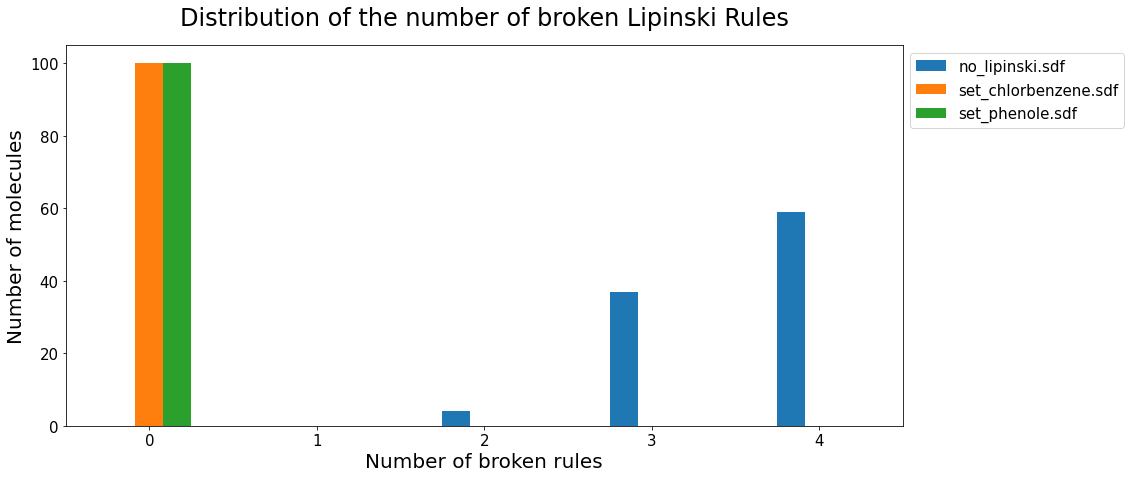

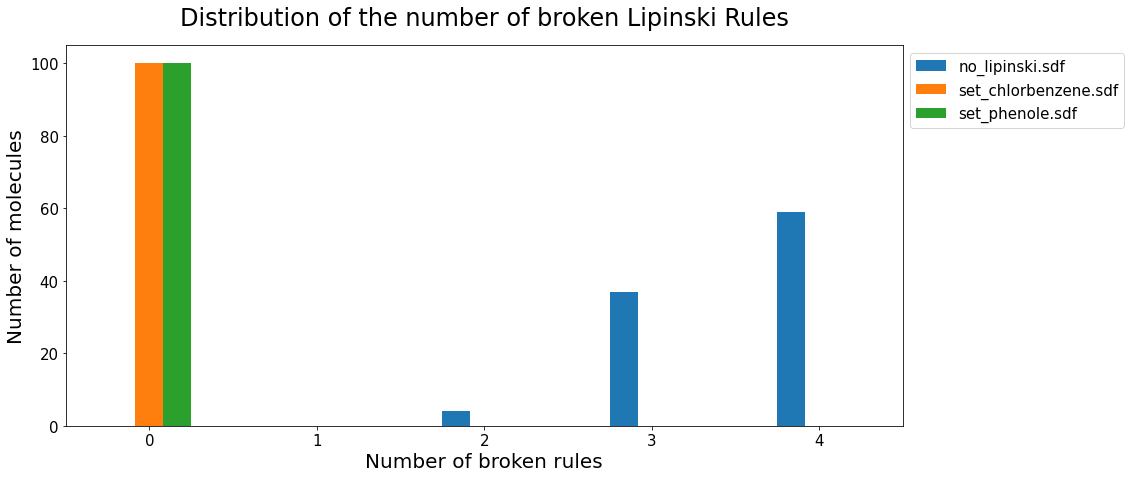

In [39]:
def lipinski_plot(all_dicts : dict,
                  data_type: str = 'pdf',
                  save_dataframe: bool = True):
    """
    This function returns a Pandas DataFrame Object and the corresponding Bar-Plot for the number of
    molecules in every Dataset breaking 0 to 4 Lipinski Rules using the 'lipinski_summary' key in the
    given dictionaries. The plot is saved in an output folder (data type can be chosen) and the 
    dataframe can also be exported as csv.
    
    args:
        all_dicts (dict): Dictionary of dictionaries with lipinski_summary_keyname.
        data_type (str): Data type for the exported image (default: png).
        save_dataframe (bool): Export dataframe as csv or not (default: True).
        
    returns:
        fig (mathplotlib.figure): Plot
    """
    lipinski_df_dict = {"Number of broken rules": [0,1,2,3,4]}
    for single_dict in all_dicts:
        header = single_dict
        lipinski_df_dict.update({header : list(all_dicts[single_dict][lipinski_summary_keyname].values())})
    lipinski_df = pd.DataFrame(lipinski_df_dict)
    if not os.path.exists('output'):
            os.makedirs('output')
    if save_dataframe == True:
        lipinski_df.to_csv('output/table_lipinski_rules.csv')
    lipinski_plot = lipinski_df.plot(x = "Number of broken rules",
                     kind='bar',
                     stacked=False,
                     rot = 0,
                     figsize = (15,7),
                     fontsize = 15)
    lipinski_plot.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=15)
    lipinski_plot.set_ylabel('Number of molecules',fontsize=20)
    lipinski_plot.set_xlabel( 'Number of broken rules' ,fontsize=20)
    lipinski_plot.set_title('Distribution of the number of broken Lipinski Rules', pad=20, fontsize=24)
    fig = lipinski_plot.figure
    fig.savefig("output/lipinski_rules_plot.%s" % (data_type), 
                bbox_inches='tight',
                transparent = True)
    return fig

lipinski_plot(testdict)

## Chemical Space Visualization

In [43]:
def chemical_space_visualization(all_dicts: dict,
                                fp_radius: int = 2,
                                fp_bits: int = 2048,
                                dimension_reduction: str = 'tsne',
                                interactive: bool = True
                                ):
    """
    This function returns a 2D-visualization of the chemical space of the molecules in all datasets using 
    the chemplot module.
    
    Args:
        all_dicts (dict): Dictionary of dictionaries including an inchi identifier list.
        fp_radius (int): Radius of the Extended Connectivity Fingerprints (default: 2).
        fp_bits (int): Size of the Extended Connetivity Fingerprints (default: 2048).
        dimentsion_reduction (str): Methode of dimension reduction (default: tsne).
        interactive (bool): Creating a interactive plot or not (default: True).
        
    Returns:
        Chemical space visualization
    """
    inchi_list = []
    target_list = []
    for single_dict in all_dicts:
        for mol in all_dicts[single_dict][identifier_keyname]:
            inchi_list.append(mol)
            target_list.append(single_dict) 
    chem_space = cp.Plotter.from_inchi(inchi_list,  # list of inchi strings which are used to get Extended Connectivity Fingerprint (alternative: smiles),
                                    target=target_list, # corresponding list for inchi_list, shows which dataset the molecules are belonging to
                                    target_type="C", # classification (classes are the datasets listed in the target_list)
                                    sim_type="structural" # similarity solely based on structure (no property is taken into account)
                                   )
    if fp_radius != 2 or fp_bits != 2048:
        new_fingerprint = descriptors.get_ecfp_from_inchi(inchi_list, target_list, radius=fp_radius, nBits=fp_bits)
        chem_space._Plotter__mols = new_fingerprint[0]
    if dimension_reduction == 'pca':
        chem_space.pca() # n_components, copy, whiten, svd_solver ...
    elif dimension_reduction == 'tsne':
        chem_space.tsne() # n_components, perplexity, learing_rate, n_iter, init, random_state ...
    elif dimension_reduction == 'umap':
        chem_space.umap() #  n_neighbors, min_dist, pca, random_state ...
    else:
        raise ValueError('dimension_reduction should be "pca", "tsne" or "umap"!')
    if interactive == False:
        chem_space.visualize_plot()
    else:
        chem_space.interactive_plot(show_plot=True)
    return chem_space
        
(chemical_space_visualization(testdict, fp_bits = 1024))


C:\Users\Hannah\anaconda3\envs\rdkit-env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Hannah\anaconda3\envs\rdkit-env\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
